# Assignment 9
## name : rocky kim 
## student id : 20152424
## github link :[https://github.com/Epicevent/assignment09](https://github.com/Epicevent/assignment09 ) 

# get training data via given code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1
print (np.shape(list_image_train[:,0]))
print (np.shape(list_label_train))
count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1



(784,)
(60000,)


# model for binary classfier



 feature funtion for a image


 def>  $\mathbb{M}$ : set of  M images
 
 
 $$ 
 \mathbb{M} = \{m_1 , m_2 , \cdots , m_M \}
 $$ 
 



# random vector drawn from a normal distribution

 $$
 r_i  \sim \mathcal{N}(\mu,\,\sigma^{2})\ 
 $$
 
 
 $$
 r_i \in \mathbb{R}^{784}
 $$
 
  
 $$
 (\mu,\,\sigma^{2}) = (0, 1)
 $$

In [2]:
def make_random_vector(numfeature): # input must be np.array :dtype int
    r =  np.empty((numfeature,size_row * size_col), dtype=float)
    mu, sigma = 0, 1 # mean and standard deviation
    for i in range(numfeature):
        r[i,:] = np.random.normal(mu, sigma, size_row * size_col)#r_i^T 
    return r,numfeature


#  Domain and codomain of feature function 


let number of feature is p


$$ 
f :  \mathbb{M} \to \mathbb{R}^{p}   
$$




# definition of feature function for training


let $$ x \in M $$ be a vector that represent an image of the size 28 × 28 


$$   
x = (x_1 ,x_2 , \cdots , x_{784})   
$$


$$ 
f(x) = (f_0(x), \cdots , f_{p-1}(x) ) 
$$


$$ 
f_i : \mathbb{R}^{784} \to \mathbb{R} 
$$


$$
f_i(x) = r_i^T x 
$$

In [3]:
def feature(i,r, image):
    '''
       i : feature index 0~ p-1
       r : np.array shape : ( p, 784) 
       image : np.array shape : ( 784 , )
       return \sum{k=0}^783 {r[i,k]*image[k]}
    '''
    return np.dot(r[i,:],image)

# Model parameter and model for getting partitioning function

# definition of colunm vector 




$$
     a_j=
  \left[ {\begin{array}{ccccc}
   f_j(m_1) \\
   f_j(m_2) \\
   \vdots \\
   f_j(m_M) 
  \end{array}}  \right]
$$




# definition of image feature Matrix A

where p is number of feature 

$$
   A=
  \left[ {\begin{array}{ccccc}
   a_0 & a_1 & \dots & a_{p-1} 
  \end{array} } \right]
$$
  
 


# definition of label vector b for least square


$$
 y_i={\begin{cases}
    1, & \text{if } m_i \text{ is image of digit '0' }.\\
   -1, & \text{otherwise}.
\end{cases}}
$$


$$
b=  \left[ {\begin{array}{ccccc}
y_1 \\
 y_2 \\
   \vdots \\
   y_N 
  \end{array} } \right]
$$

In [4]:
def makeA( imagelist,r,num_feature ): 
    '''
        imagelist : np.array with shape (784, 60000)
        return . transeposed array with shape (60000,  num of feature)
    '''
    Arows = np.shape(imagelist)[1]  # since A's shape is ( shape(imagelist.T) )
    Acols = num_feature
    A = np.empty((Arows , Acols), dtype=float)
    for i in range( Arows ):
        for j in range(Acols):
                A[i,j] = feature(j ,r,imagelist[:,i]) 
    return A


def makeb (labellist):
    '''
        labellist : np.array with shape (60000,)
        return :column vector with shape (1,60000) and value in {1, -1}
    '''
    numdata = np.shape(labellist)[0]
    b = labellist.reshape((numdata, 1))
    condlist = [b==0, b!=0]
    choicelist = [1, -1]
    return np.select(condlist, choicelist)


# model parameter 

${\theta} \in {\mathbb{R}^{N}}$ denotes model parameter


$N (= p )$ is number of feature 

$$
\theta =  \left[ {\begin{array}{ccccc}
  \theta_1 \\
  \theta_2 \\  
  \vdots \\
  \theta_N
  \end{array} } \right] 
$$



# the least square problem 
   
   find $\theta$ that minimize 

$$ 
\| A\theta - b   \|^2 = \sum_{j=1}^{n}{r_j^2} \quad where, \quad r_j = y_j -\tilde{f}(x_j)
$$


# QR decomposition of A
More generally, we can factor a complex $m \times n$ matrix $A$, with $m≥n$, as the product of an $m\times m$ unitary matrix $Q$ and an $m\times n$ upper triangular matrix $R$.  As the bottom ($m − n$) rows of an $m\times n$ upper triangular matrix consist entirely of zeroes, it is often useful to partition $R$, or both $R$ and $Q$:
$$
  A = QR = Q \begin{bmatrix} R_1 \\ 0 \end{bmatrix}
    = \begin{bmatrix} Q_1, Q_2 \end{bmatrix} \begin{bmatrix} R_1 \\ 0 \end{bmatrix}
    = Q_1 R_1,
$$




# the solution $\theta$ Satisfies below equations


$$(A^T A)
   \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2 \\
   \vdots \\
   \theta_N
  \end{array} } \right]=A^Tb  
$$


$$
\iff 
(R_1^T R_1) \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2 \\
   \vdots \\
   \theta_N
  \end{array} } \right] = A^Tb = R_1^{T}Q_1^Tb
$$


# let $\text{R}= R_1$ , compute $\text{R}^T \text{R}$


let $r_i$ is row vector($\in \mathbb{R}^{784}$) of matrix $\text{R}$ 


$$\text{R} = \left[ {\begin{array}{ccccc}
   r_1 \\
   r_2 \\
   \vdots \\
   r_N
  \end{array} } \right]
$$
 
 
$$\text{R}^T \text{R} = 
   r_1^T r_1 + r_2^T r_2 + \cdots + r_N^T r_N 
$$


$$
\text{R}^T \text{R} \theta  = r_1^T r_1 \theta + r_2^T r_2 \theta + \cdots + r_N^T r_N  \theta
$$


$$
\text{R}^T  q  = r_1^T  q + r_2^T  q + \cdots + r_N^T q
$$


# the least square solution theta statisfy


$$
\sum_{i=1}^{N}\sum_{k\geq i}{(R_{i,k})r_k\theta} =\sum_{i=1}^{N} \sum_{k\geq i}{R_{i,k}q_{k}} 
$$


# solve the problem

suppose we have 

$$\theta_{l+1},\cdots,\theta_N$$ 

that satisfies


$$\forall i \geq l+1$$


$$
\sum_{k\geq i}{(R_{i,k})r_k\theta} = \sum_{k\geq i}{R_{i,k}q_{k}} 
$$


then We define $\Theta_l$ as

if $\text{R}_{l,l}\neq 0$
    
    
$$
\Theta_l = (q_{l} - \sum_{ l \lt i \leq N }R_{l,i}\theta_N)/R_{l,l}
$$


else (in this case $\text{R}_{l,l} = 0$ )


$$
\Theta_l = 0 
$$


then we can pick  
$$ \theta_l = \Theta_l$$ 


finally we get


$$\theta_l,\cdots,\theta_N$$


that satisfies 


$$\forall i \geq l$$


$$
\sum_{k\geq i}{(R_{i,k})r_k\theta} = \sum_{k\geq i}{R_{i,k}q_{k}} 
$$

# Back substitution to solve the problem


let 


$$\text{R}_{ij} = R_1(i,j)$$   


let


$$Q_1^Tb = q =\left[ {\begin{array}{ccccc}
   q_1 \\
   q_2 \\
   \vdots \\
   q_N
  \end{array} } \right]$$ 
 
 
write

$$
( R_1) \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2 \\
   \vdots \\
   \theta_N
  \end{array} } \right] = \left[ {\begin{array}{ccccc}
   q_1 \\
   q_2 \\
   \vdots \\
   q_N
  \end{array} } \right] 
$$ as


$$
\begin{aligned}
   \text{R}_{11} \theta_{1} +\text{R}_{12} \theta_{2}+ \cdots + 
   \text{R}_{1,N-1}\theta_{N-1} + \text{R}_{1N}\theta_{N}  &= q_1 \\
   \vdots \\
   \text{R}_{N-1,N-1} \theta_{N-1} + \text{R}_{N-1,N}\theta_{N}&= q_{N-1}\\
   \text{R}_{N,N}\theta_{N}&= q_{N}
\end{aligned}
$$



# get sudo solution of Back substitution


Of course, this equation may not have solution


( if some digonal element is zero )


but the equation implies the equation of least square plobrem .


from last equation we get 


$$  
  \theta_N=\begin{cases}
    q_{N}/R_{NN} & \text{if $R_{NN} \neq 0$ }.\\
    0 & \text{if $R_{NN}=0$ }.
  \end{cases}
$$


I from 2nd to last equation we get


$$
  \theta_{N-1}=\begin{cases}
    (q_{N-1} - R_{N-1,N}\theta_N)/R_{N-1,N-1} & \text{if $R_{N-1,N-1} \neq 0$ }.\\
    0 & \text{if $R_{N-1,N-1}=0$ }.
  \end{cases}
$$



I continue to get $\theta_{N-2},\theta_{N-3},\cdots,\theta_{1}$ 


# then this $\theta$ satisfy the least square problem


-

In [5]:
def solve_model_parameter(A,b):
    if  np.shape(b)[0] !=1:
        numdata = np.shape(b)[0]
        b = b.reshape((numdata, 1))
    numfeature = np.shape(A)[1]
    Q ,R = np.linalg.qr(A)
    q =np.matmul(Q.T, b)
    theta_vector = np.zeros((numfeature,1),dtype=float)
    for i in range(numfeature):
        n = numfeature - i # 1<=n <= numfeature (decreasing)
        if R[n-1,n-1] == 0 : # R_(n,n)
            theta_vector[n-1,0] = 0 # theta_vector_(n,1)
        else:
            rthetasum =0 
            for j in range (numfeature-n):
                l = numfeature- j # 1<= l <=N ( decreasing )
                rthetasum += R[n -1 ,l-1]*theta_vector[l-1,0]
            theta_vector[n-1,0] = (q[n-1,0] - rthetasum)/R[n-1,n-1]
    return theta_vector



# Try with varying the number of parameters p with thestandard deviation σ = 1 of the random feature vector r : 1,2, ... 32768 

In [6]:
r_field,r_max = make_random_vector(32768)
def getr(p_ndarray):
    len_r_list = np.shape(p_ndarray)[0]
    r_list = []
    index_for_access_r_field = 0
    ind = index_for_access_r_field 
    for p in p_ndarray:
        p = int(p)
        if ind+p<len_r_list:
            nind =ind + p
        else:
            ind = 0
            nind = p
        r_list.append(r_field[ind:ind+p,:]) # reuse aleady initialized data
        ind=nind
    return r_list,p_ndarray   

In [7]:
def train_with_varying_p_to_get_bestF1score( training_function ): #training_function int \to float and it is havvy       
    num_piece =10
    s_point = 0
    e_point = num_piece # the e_point is ommited ! 
    bestTP = np.zeros(10000,dtype=bool) 
    bestTF = np.zeros(10000,dtype=bool) 
    bestFP = np.zeros(10000,dtype=bool) 
    bestFN = np.zeros(10000,dtype=bool) 
    for level in range(4):
        level = np.float(level)
        x = range(s_point,e_point)
        prev_s_point = s_point
        friction_of_power = np.power(num_piece,(-level))
        x_exp =[  np.power(2,(friction_of_power*i)) for i in x ] 
        x_caculate =np.array(x_exp,dtype = int) 
        list_targetset = f(x_caculate)
        y = list_targetset[4] 
        prev_index = np.argmax(y) 
        if type(list_targetset[0][prev_index]) is np.ndarray:
            bestTP = ( list_targetset[0][prev_index])
            bestTF = (list_targetset[1][prev_index])
            bestFP = (list_targetset[2][prev_index])
            bestFN = (list_targetset[3][prev_index])
        bestF1score = float(y[prev_index])
        bestP = x_caculate[prev_index]
        x_plot = x
        plt.subplot(2, 2, level+1)
        plt.title("level="+str(int(level))+ ":f(2^("+"{:.2f}".format(friction_of_power)+")*x)" )
        plt.plot(x_plot,y)
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        
        s_point= int(num_piece*(prev_s_point+prev_index-0.5))
        e_point = int(num_piece*(prev_s_point+prev_index+0.5))
        
    return bestTP,bestTF,bestFP,bestFN,bestF1score,bestP
    

thegraph is -x^2 + 800x
peak value is 160000.00 at x= 400


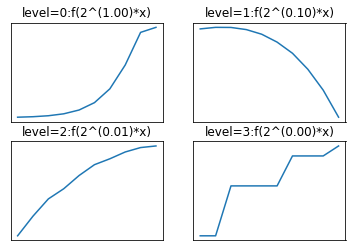

In [8]:
# test code for varify above code
f = (lambda x : (x*0,x*0,x*0,x*0,-np.power(x,2) + 800*x ))
tp,tf,fp,fn,f1,p =train_with_varying_p_to_get_bestF1score(f)
print("thegraph is -x^2 + 800x")
print("peak value is {:.2f} at x= {:d}".format(f1,p))

plt.show()

# The partitioning function

$$\tilde{f} : \mathbb{R}^{ 784}\to \mathbb{R}$$ 

is defined by 
inner product of feature and model parameter


$$
   \tilde{f}(x; \theta) =  \langle \theta,f(x)\rangle 
$$


$$
   \tilde{f}(x; \theta) = \theta_1f_1(x) +\theta_2f_2(x) + \cdots +\theta_{p}f_{p}(x)
$$

$$
    A \theta = 
   \left[ {\begin{array}{ccccc}
  \tilde{f}(x_1) \\
   \tilde{f}(x_2) \\  
  \vdots \\
    \tilde{f}(x_N)
  \end{array} } \right]
$$

# binary classifier f(x) 

$$f(x) = sign( \tilde{f}(x))$$ 


using the sign function:


$$
  sign(x)=\begin{cases}
    +1 & \text{ if  $ (x)>0 $ }.\\
    -1 & \text{if  $ (x)<0 $ }.
  \end{cases}
$$

In [9]:
def imagetraining_and_caculateresult(r,numfeature):
    A_train = makeA (list_image_train,r,numfeature)
    b_train = makeb (list_label_train)
    model_parameter =solve_model_parameter(A_train,b_train)
    A_test = makeA (list_image_test,r,numfeature)
    b_test = makeb (list_label_test)
    partitioning_vec = np.matmul(A_test,model_parameter) # test input partition 
    # : if x < 0 return 1 else return 1
    partitioning_vec [ partitioning_vec == 0 ]  = 1 
    classifier_vec = np.sign(partitioning_vec)
    return classifier_vec ,b_test

# F1 score 

$$ 
    F_1 = \left(\frac{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}}{2}\right)^{-1} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}
$$


$$
\text{Precision}=\frac{TP}{TP+FP} 
$$


$$
\text{Recall}=\frac{TP}{TP+FN}  
$$



$$
\therefore F_1 = (\frac{\frac{TP+FP}{TP} + \frac{TP+FN}{TP}}{2})^{-1} = (\frac{2TP+FP+FN}{2TP})^{-1} =\frac{2TP}{2TP+FP+FN}
$$

In [10]:
def caculateF1score(classifier_vec , b_test):
    true = (classifier_vec == b_test) # true
    false = ~true #false 
    def positive(true_or_false,classifier_vec):
        return (true_or_false[:,0] & (classifier_vec == 1.0)[:,0])
    def negative(true_or_false,classifier_vec):
        return (true_or_false[:,0] & (classifier_vec == -1.0)[:,0])
    F_1score = 2 # In all cases, this value never exceeds 1.
                # Therefore, if 2 is returned, you can see that there was an error.
    TP = positive(true,classifier_vec)
    TN = negative(true,classifier_vec)
    FP = positive(false,classifier_vec)
    FN = negative(false,classifier_vec) 
    if 2*np.sum(TP) + np.sum(FP) + np.sum(FN) !=0:
        F_1score =  2*np.sum(TP) /( 2*np.sum(TP) + np.sum(FP) +np.sum (FN))
    else:
        F_1score = 0
    
    return TP,TN,FP,FN,F_1score 

# define functions for caculateF1score among varing p 

In [11]:
def  caculateF1score_among_varing_p(r_list,ndarray_p):
    len_r_list = len(r_list)
    ret_list = list()
    for i in range(4):
        ret_list.append(np.zeros((len_r_list,num_test),dtype=bool))# TP,TN,FP,FN
    ret_f1score=np.zeros(len_r_list,dtype=float)
    ret_list.append(ret_f1score)
    for i in range(len_r_list):
        r= r_list[i]
        numfeature = ndarray_p[i]
        classifier_vec , b_test = imagetraining_and_caculateresult(r,numfeature)
        reti= caculateF1score(classifier_vec , b_test)
        print(reti[4] )# after 40 times printing the training function with varing p is finished
        ret_list[0][i,:]= reti[0]
        ret_list[1][i,:]=reti[1]
        ret_list[2][i,:]=reti[2]
        ret_list[3][i,:]=reti[3]
        ret_list[4][i]=reti[4] 
    return ret_list

# Present the best F1 score among the results with different number of parameters p = 1,2, ...,1024

warning : following code is very time cosumming !! 
description : first it get maximum f1 among p= 1,2,4,8,16,32,64,128,256,512,1024
             assume p=128 we get max
             second it get maximum f1 among 
             

$$p= 2^{6.5},\cdots,2^{7},\cdots,2^{7.5}$$ 
         
         

assume
             
             
$$p=2^{7.25}$$
             
             
 we get max
 third it get maxium f1 among 

             
$$p = 2^{7.25-\frac{0.5}{16}},\cdots,2^{7.25},\cdots,2^{7.25+\frac{0.5}{16}}$$
             

assume 


$$p=2^{7.28125}$$
             

we get max 
 last it get maximum f1 among


$$p=  2^{7.28125-\frac{0.5}{256}},\cdots,2^{7.25},\cdots,2^{7.28125+\frac{0.5}{256}}$$



number of caculation : 64times ( each level it train and evaluation 16times ) 

0.09023415191319246
0.026774847870182555
0.02906208718626156
0.04940119760479042
0.41765071472964577
0.7336860670194003
0.8478260869565217
0.9085239085239085
0.9276248725790011
0.9376278118609407
0.9340153452685422
0.9361919346605411
0.9375
0.9381074168797954
0.9355828220858896
0.9376278118609407
0.9376915219611849
0.9381074168797954
0.9371486969851814
0.9361919346605411
0.9400307534597643
0.93900563813429
0.9379805228088159
0.9395491803278688
0.9406345957011258
0.9381074168797954
0.9359959037378393
0.9364754098360656
0.934560327198364
0.9355168884339816
0.9406345957011258
0.9406345957011258
0.9406345957011258
0.9406345957011258
0.9406345957011258
0.9406345957011258
0.9406345957011258
0.9390681003584229
0.9390681003584229
0.9390681003584229
when p =441 , F_1 is largest :0.940635


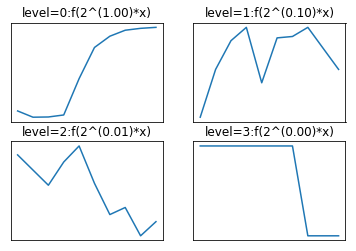

In [12]:
f =  (lambda x : caculateF1score_among_varing_p(*getr(x)))
TP,TN,FP,FN,F_1score,p  = train_with_varying_p_to_get_bestF1score(f)# printing '(10000,)' 64 times and get best p ... 
print("when p ={:d} , F_1 is largest :{:f}".format(p,F_1score))

# Plot the average image (28 X 28)

In [18]:

def draw_average(condition,title):
    f2 = plt.figure()
    im_average  = np.zeros((size_row * size_col), dtype=float)
    im_count    = 0
    for i in range(num_test):
        if condition[i] : # TP TN FP FN
            im_average += list_image_test[:, i]
            im_count += 1 # 

    im_average /= im_count
    plt.title(title)
    plt.imshow(im_average.reshape((size_row, size_col)), 
               cmap='Greys', interpolation='None') 
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()

# plot average TP

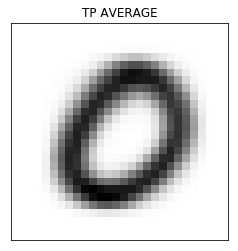

In [19]:
draw_average(TP,"TP AVERAGE") # true positive

# plot average TN

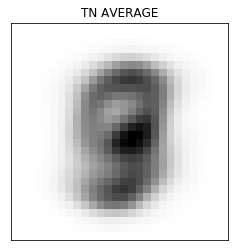

In [20]:
draw_average(TN,"TN AVERAGE") # true negative

# plot average FP

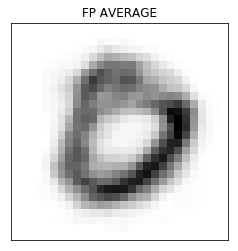

In [21]:
draw_average(FP,"FP AVERAGE") # false positive

# plot average FN

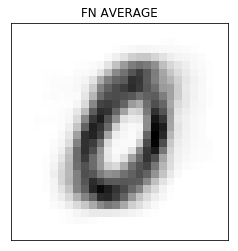

In [22]:
draw_average(FN,"FN AVERAGE") #false negative

# when p = 441 , f1 = 0.940635 

In [23]:
print("Total: {:d} \nTP: {:d} ,TN: {:d}, FP: {:d} ,FN: {:d}".format( np.size(TP),
    np.sum(TP),np.sum(TN),np.sum(FP),np.sum(FN)))

Total: 10000 
TP: 919 ,TN: 8965, FP: 55 ,FN: 61
